In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 데이터 생성 (불균형 데이터셋)
raw_X, raw_y = make_classification(
    n_classes=2, class_sep=2, weights=[0.05, 0.95],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=5, n_clusters_per_class=1,
    n_samples=1000, random_state=42
)

In [17]:
# Raw
raw_feature_df = pd.DataFrame(raw_X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
raw_target_df = pd.DataFrame(raw_y, columns=['target'])
raw_df = pd.concat(
    [raw_feature_df, raw_target_df],
    axis=1
)
raw_df['target'].value_counts()

target
1    950
0     50
Name: count, dtype: int64

In [18]:
# Over sampled
smote = SMOTE(random_state=42)
os_X, os_y = smote.fit_resample(raw_X, raw_y)

os_feature_df = pd.DataFrame(os_X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
os_target_df = pd.DataFrame(os_y, columns=['target'])

os_df = pd.concat(
    [os_feature_df, os_target_df],
    axis=1
)

os_df['target'].value_counts()

target
1    950
0    950
Name: count, dtype: int64

In [24]:
# PCA Decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_raw_feature_df = pd.DataFrame(pca.fit_transform(raw_feature_df), columns=['x_1','x_2'])
pca_raw_df = pd.concat(
    [pca_raw_feature_df, raw_df['target']],
    axis=1
)

pca_os_feature_df = pd.DataFrame(pca.fit_transform(os_feature_df), columns=['x_1','x_2'])
pca_os_df = pd.concat(
    [pca_os_feature_df, os_df['target']],
    axis=1
)

# >> (pca_raw_df, pca_os_df)

In [25]:
# TSNE Decomposition
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

tsne_raw_feature_df = pd.DataFrame(tsne.fit_transform(raw_feature_df), columns=['x_1', 'x_2'])
tsne_raw_df = pd.concat(
    [tsne_raw_feature_df, raw_df['target']],
    axis=1
)

tsne_os_feature_df = pd.DataFrame(tsne.fit_transform(os_feature_df), columns=['x_1', 'x_2'])
tsne_os_df = pd.concat(
    [tsne_os_feature_df, os_df['target']],
    axis=1
)

# >> (tsne_raw_df, tsne_os_df)

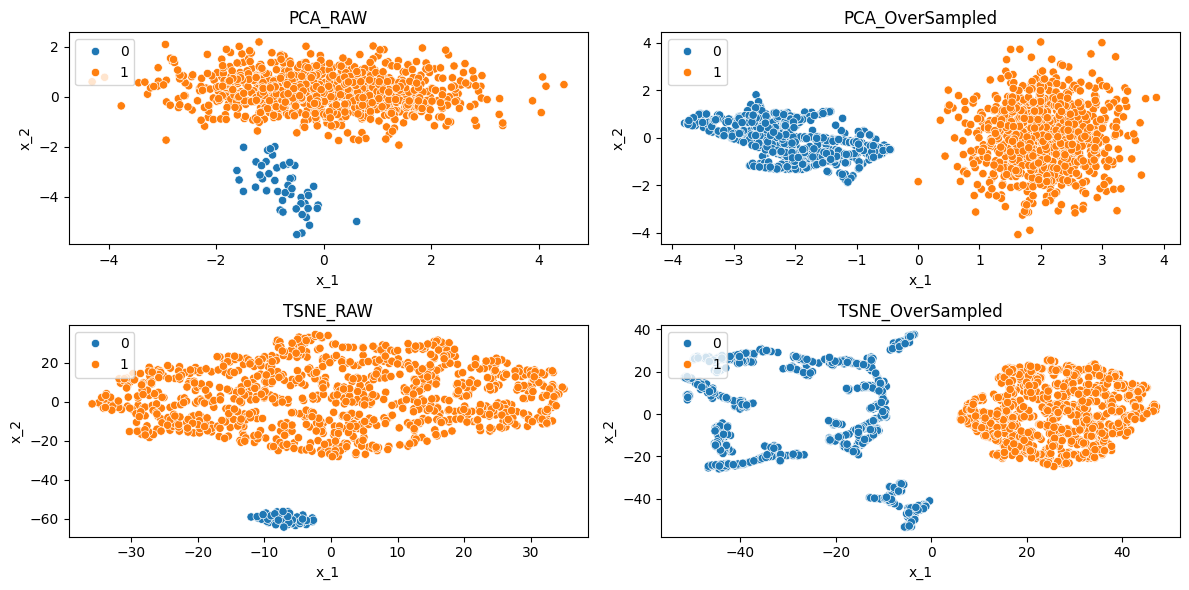

In [33]:
# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()
sns.scatterplot(pca_raw_df,
                x='x_1',
                y='x_2',
                hue='target',
                ax=axes[0],
                )
axes[0].set_title('PCA_RAW')
axes[0].legend(loc='upper left')

sns.scatterplot(pca_os_df,
                x='x_1',
                y='x_2',
                hue='target',
                ax=axes[1],
                )
axes[1].set_title('PCA_OverSampled')
axes[1].legend(loc='upper left')

sns.scatterplot(tsne_raw_df,
                x='x_1',
                y='x_2',
                hue='target',
                ax=axes[2],
                )
axes[2].set_title('TSNE_RAW')
axes[2].legend(loc='upper left')

sns.scatterplot(tsne_os_df,
                x='x_1',
                y='x_2',
                hue='target',
                ax=axes[3],
                )
axes[3].set_title('TSNE_OverSampled')
axes[3].legend(loc='upper left')

plt.tight_layout()
plt.show()